# CS156 LBA   
# Image Reconstruction
### Yuhao Chen
### Fall 2019

In [53]:
%matplotlib inline
from PIL import Image
import PIL.ImageOps
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [65]:
imgs = glob('imgs/*')

In [67]:
print(sorted(imgs))

['imgs/01.jpeg', 'imgs/02.jpeg', 'imgs/03.jpeg', 'imgs/04.jpeg', 'imgs/05.jpeg', 'imgs/06.jpeg', 'imgs/07.jpeg', 'imgs/08.jpeg', 'imgs/09.jpeg', 'imgs/10.jpeg', 'imgs/11.jpeg', 'imgs/12.jpeg', 'imgs/13.jpeg', 'imgs/14.jpeg', 'imgs/15.jpeg', 'imgs/16.jpeg', 'imgs/17.jpeg', 'imgs/18.jpeg', 'imgs/19.jpeg', 'imgs/20.jpeg', 'imgs/21.jpeg', 'imgs/22.jpeg', 'imgs/23.jpeg', 'imgs/24.jpeg']


In [68]:
imgs = sorted(glob('imgs/*'))

imgs_set=[]

# Open all images and store them in datasets
for img in imgs:
    im = Image.open(img)
    imgs_set.append(np.array(im.resize((512,384))))

df1 = np.asarray(imgs_set)
print(df1.shape)

(24, 384, 512, 3)


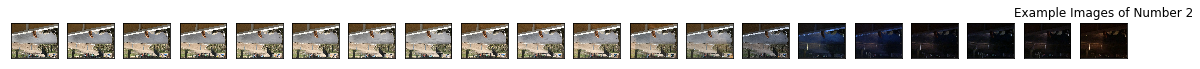

In [72]:
p1 = plt.figure(figsize=(20, 2))
for i in range(20):
    ax = p1.add_subplot(1, 20, i + 1, xticks = [], yticks = [])
    ax.imshow(df1[i])
    
plt.title('Example Images of Number 2')
plt.show()

In [ ]:
fig, axes = plt.subplots(4,6)
for i,ax in enumerate(axes.flat):
    ax.imshow(df1[i])
plt.title('Example Images of Number 2')
plt.show()

In [43]:
processed_imgs_set=np.asarray(imgs_set)
print(processed_imgs_set.shape)
processed_imgs_set=np.stack(i for i in processed_imgs_set[:,0])
print(processed_imgs_set)

(24, 2)
[[ 89  60  26 ...  89  67  54]
 [ 99  73  38 ...  98  79  65]
 [ 77  51  18 ...  94  74  63]
 ...
 [ 98  68  32 ... 101  81  70]
 [ 75  54  25 ... 188 137  90]
 [ 87  62  32 ...  74  56  44]]


/Users/cyhsmac/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2802: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if self.run_code(code, result):


In [38]:
pca = PCA(n_components=2)
transfered_set = pca.fit_transform(processed_imgs_set)
print(transfered_set.shape)

(24, 2)


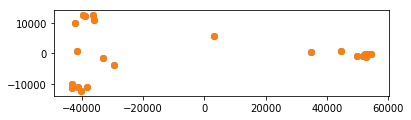

In [40]:
plt.scatter(transfered_set[:,0],transfered_set[:,1])
plt.show()

In [42]:
X_recon = pca.inverse_transform(transfered_set)
print(X_recon.shape)

(24, 589824)
